In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)

In [ ]:
pelis = pd.read_csv('datos_peliculas.csv')
pelis.head()

,pelicula,año,ratings,genero,ventas,presupuesto,secuela,vistas_youtube,positivos_youtube,negativos_youtube,comentarios,seguidores_agregados
0,13 Sins,2014,6.3,8,9130,4000000.0,1,3280543,4632,425,636,1120000.0
1,22 Jump Street,2014,7.1,1,192000000,50000000.0,2,583289,3465,61,186,12350000.0
2,3 Days to Kill,2014,6.2,1,30700000,28000000.0,1,304861,328,34,47,483000.0
3,300: Rise of an Empire,2014,6.3,1,106000000,110000000.0,2,452917,2429,132,590,568000.0
4,A Haunted House 2,2014,4.7,8,17300000,3500000.0,2,3145573,12163,610,1082,1923800.0


In [ ]:
pelis = pelis.drop(['pelicula'], axis=1) # We dont need the movie name

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split


We wanna predict the gender by the popularity

In [ ]:
from sklearn.metrics import f1_score, accuracy_score
var_predict = 'genero'
X = pelis.drop(var_predict, axis=1)
y = pelis[var_predict]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
y.value_counts()

,count
genero,
1,65
8,54
3,46
9,13
12,13
10,12
2,12
15,10
6,3


In [ ]:
KNeighborsClassifier?

In [ ]:
len(y_train.unique())

10

In [ ]:
knn_class = KNeighborsClassifier( n_neighbors=10, weights='uniform') # uniform is that we dont want that the model assign more weights in the nearest obs


knn_class.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=10)

In [ ]:
preds = knn_class.predict(X_test)

f1_score(y_test, preds, average='micro') # mirco for unbalanced population

0.3617021276595745

In [ ]:
from sklearn.model_selection import cross_val_score
knn_class =KNeighborsClassifier(n_neighbors=10, weights='distance')
knn_class.fit(X_train, y_train)
preds = knn_class.predict(X_test)
f1_score(y_test, preds, average='micro')



0.3829787234042553

In [ ]:
from sklearn.metrics import f1_score


def f1_multietiqueta(estimador, X, y):
    preds = estimador.predict(X)
    return f1_score(y, preds, average="micro")

Se han truncado las últimas 5000 líneas del flujo de salida.
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 144, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<ipython-input-14-c67f0cf284ff>", line 5, in f1_multietiqueta
    preds = estimador.predict(X)
            ^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py", line 277, in predict
    neigh_dist, neigh_ind = self.kneighbors(X)
                            ^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_base.py", line 854, in kneighbors
    raise ValueError(
V

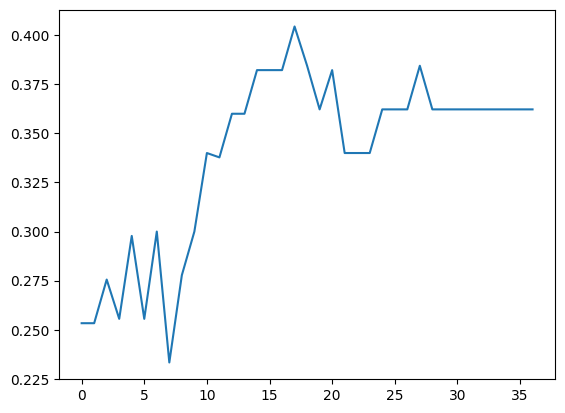

In [ ]:
from sklearn.model_selection import cross_val_score
cros_val =[]
for i in range(1, 150):
  knn_class =KNeighborsClassifier(n_neighbors=i, weights='distance')
  knn_class.fit(X_train, y_train)
  preds = knn_class.predict(X_test)
  yo=f1_score(y_test, preds, average='micro')
  cros_val.append(cross_val_score(knn_class, X_test, y_test, cv=5, scoring=f1_multietiqueta).mean())

plt.plot(cros_val)


In [ ]:
[X_test.iloc[0]]

[año                         2015.0
 ratings                        7.7
 ventas                  49500000.0
 presupuesto             30000000.0
 secuela                        1.0
 vistas_youtube          11476882.0
 positivos_youtube          40496.0
 negativos_youtube           1383.0
 comentarios                 4435.0
 seguidores_agregados           0.0
 Name: 218, dtype: float64]

In [ ]:
distance, index =knn_class.kneighbors([X_test.iloc[0]], n_neighbors=1) # this is to get the nearest neighbor

distance, index

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[8648469.61304609]]), array([[156]]))

In [ ]:
X_train.iloc[[index[0][0]]] # This is the nearest neighbor

,año,ratings,ventas,presupuesto,secuela,vistas_youtube,positivos_youtube,negativos_youtube,comentarios,seguidores_agregados
191,2015,7.3,42500000,25000000.0,1,11036701,50002,1005,3525,776000.0


##KNN para problemas de regresión
Vamos a utilizar ahora el algoritmo KNN para un problema de regresión, KNN funciona igual para hacer regresiones, simplemente que en vez de una votación donde la clase más común entre los vecinos más próximos es la elegida, se hace una interpolación de los valores de la variable numérica objetivo de los vecinos.

en concreto vamos a estimar las ventas de entradas en taquilla de una película en función de su popularidad online y presupuesto.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

pelis.columns

X=pelis.drop(['ventas'], axis =1)

y= pelis['ventas']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_reg = KNeighborsRegressor(n_neighbors=10, weights='distance')

knn_reg.fit(X_train, y_train)

preds = knn_reg.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, preds)}')
print(f'MAE: {mean_absolute_error(y_test, preds)}')
print(f'R2: {r2_score(y_test, preds)}')




MSE: 3031696462504403.5
MAE: 36419976.744484775
R2: 0.42294697754448496


In [ ]:
from sklearn.model_selection import cross_val_score

np.sqrt(cross_val_score(KNeighborsClassifier(n_neighbors=10, weights='distance'), X=pelis[pelis.drop([ 'genero'], axis =1).columns], y=pelis['genero'], cv=5,scoring='f1_micro').mean())

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


np.float64(0.5541033543388334)

In [ ]:
X=pelis.drop(['genero'], axis =1)

y= pelis['genero']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

knn_f1=KNeighborsClassifier(n_neighbors=10, weights='distance')

knn_f1.fit(X_train, y=y_train)
preds = knn_f1.predict(X_test)

print(f1_score(y_test, preds, average='micro'))

0.3829787234042553
